In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
 #Load real dataset (Boston housing)
data = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Boston.csv')
data.head()



,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
x = data['RM']
y = data['MEDV']

In [22]:
# normalize x and y
x = (x-np.mean(x)/np.std(x))
y = (x-np.mean(y)/np.std(y))


In [23]:
m= 0
b = 0
alpha = 0.01
epchos = 1000
n = len(x)


In [25]:
cost_list = []
for i in range(epchos):
    y_pred = m * x + b
    
    dm = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y-y_pred)
    # update parameters
    m = m - alpha * dm
    b = b - alpha * db
    # cumpute cost mean error
    cost = np.mean((y - y_pred)**2)
    cost_list.append(cost)

In [26]:
# Print final parameters and cost
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")
print(f"Final cost: {cost}")

Final slope (m): 1.0000000000018614
Final intercept (b): 1.9940882542869423
Final cost: 1.1720644342187651e-17


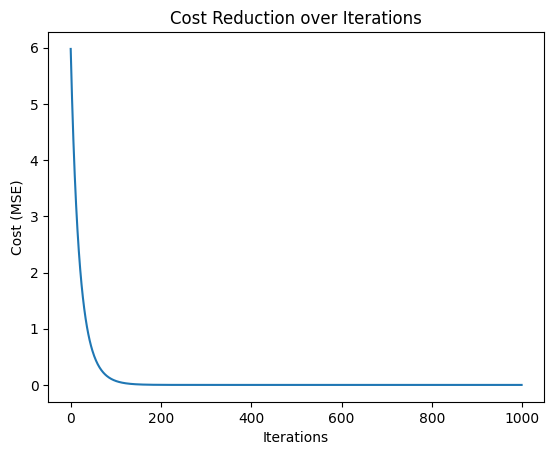

In [28]:
plt.plot(range(epchos), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction over Iterations')
plt.show()

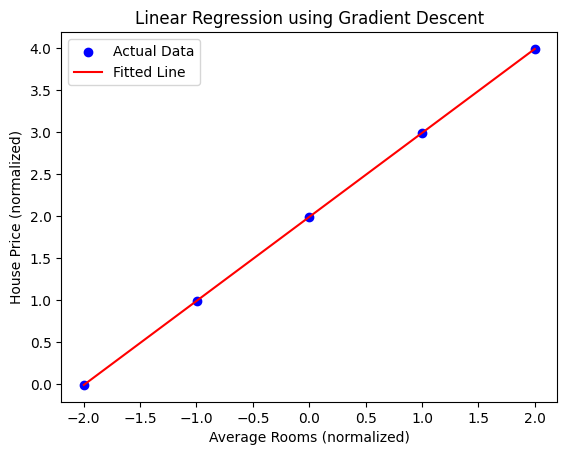

In [29]:
# Plot the fitted line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, m * x + b, color='red', label='Fitted Line')
plt.xlabel('Average Rooms (normalized)')
plt.ylabel('House Price (normalized)')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

Final slope (m): 0.695359945901271
Final intercept (b): -4.726653850925891e-16
Final cost: 0.5164745440086658


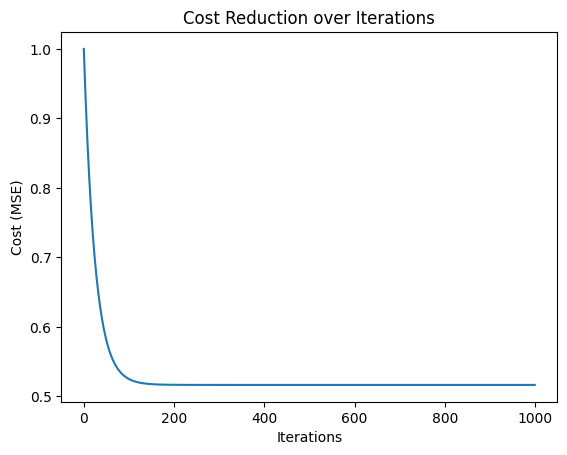

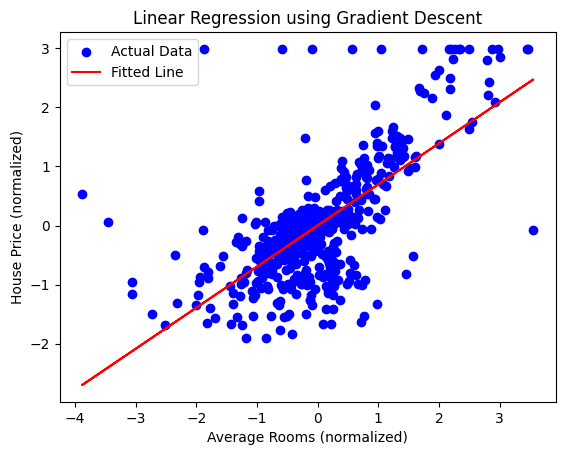

In [30]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load real dataset (Boston housing)
data = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Boston.csv')

# Select one feature (RM = average number of rooms per house)
x = data['RM'].values
y = data['MEDV'].values

# Normalize (important for gradient descent stability)
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

# Initialize parameters
m = 0      # slope
b = 0      # intercept
alpha = 0.01   # learning rate
epochs = 1000  # number of iterations
n = len(x)

# To store cost values for each iteration
cost_list = []

# Gradient Descent Loop
for i in range(epochs):
    # Predicted values
    y_pred = m * x + b

    # Calculate gradients (partial derivatives)
    dm = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    # Update parameters
    m = m - alpha * dm
    b = b - alpha * db

    # Compute cost (Mean Squared Error)
    cost = np.mean((y - y_pred) ** 2)
    cost_list.append(cost)

# Print final parameters and cost
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")
print(f"Final cost: {cost}")

# Plot cost reduction
plt.plot(range(epochs), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction over Iterations')
plt.show()

# Plot the fitted line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, m * x + b, color='red', label='Fitted Line')
plt.xlabel('Average Rooms (normalized)')
plt.ylabel('House Price (normalized)')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()


In [18]:
# Import library
from sklearn.datasets import make_regression
import pandas as pd

# Create a regression dataset with 1 feature and 4 samples
x, y = make_regression(n_samples=4, n_features=1, noise=80, random_state=13)

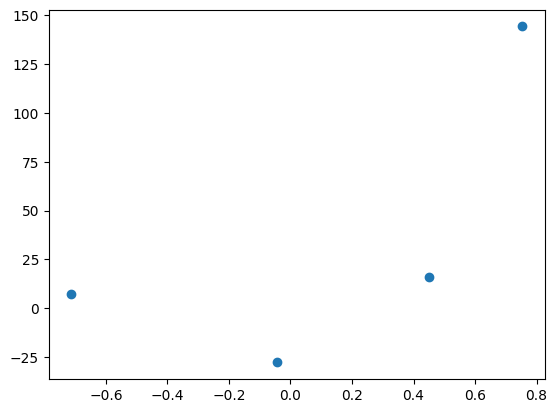

In [19]:
import matplotlib.pyplot as pll
plt.scatter(x,y)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
model.coef_

array([78.35063668])

In [14]:
model.intercept_

np.float64(8.881784197001252e-16)

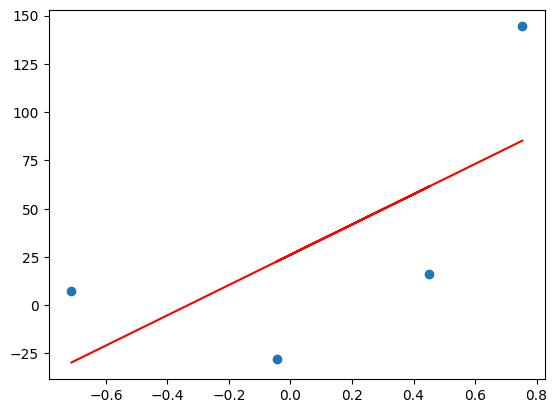

In [22]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "red")

In [23]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * x) + 100).reshape(4)

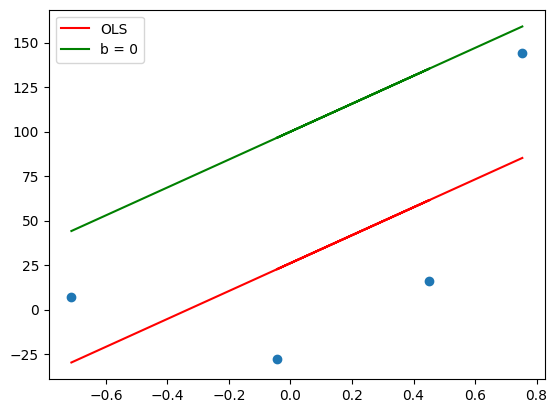

In [25]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "red",label="OLS")
plt.plot(x,y_pred, color="green",label = "b = 0")
plt.legend()
plt.show()

In [33]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [34]:

# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

np.float64(59.072236591790784)